In [34]:
import pandas as pd


In [35]:
students = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Вывести отношение количества студентов, у которых в колонке lunch указано 'free/reduced' к общему числу студентов:

In [36]:
query = students['lunch'] == 'free/reduced'
free_student_meals = students.loc[query]
free_student_meals.head()

print(len(free_student_meals.index) / len(students.index))

0.355


In [37]:
query = students['lunch'] == 'standard'
standard_student_meals = students.loc[query]
standard_student_meals.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


In [38]:
free_student_meals.mean()

math score       58.921127
reading score    64.653521
writing score    63.022535
dtype: float64

In [39]:
standard_student_meals.mean()

math score       70.034109
reading score    71.654264
writing score    70.823256
dtype: float64

In [40]:
free_student_meals.var()

math score       229.824270
reading score    221.871139
writing score    238.202881
dtype: float64

In [41]:
standard_student_meals.var()

math score       186.418089
reading score    191.285560
writing score    205.620887
dtype: float64

In [42]:
free_student_meals.describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [43]:
students.columns = [x.replace(' ', '_') for x in students.columns]
students.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Теперь повторим оба задания и сделаем их нормально.

Число студентов с бесплатным обедом найдём при помощи метода value_counts, который считает число классов для одного признака(столбца).
Параметр "normalize=True" позволяет перевести эти числа в удобный десятичный формат.

In [44]:
students['lunch'].value_counts(normalize=True)

standard        0.645
free/reduced    0.355
Name: lunch, dtype: float64

In [45]:
students[students["lunch"] == 'free/reduced'].describe()

,math_score,reading_score,writing_score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [46]:
students[students['lunch'] == 'standard'].describe()

,math_score,reading_score,writing_score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


Поработаем теперь с такими методами, как groupby, filter, assign и тд.


In [47]:
dota_heroes = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
dota_heroes.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [48]:
dota_heroes['legs'].value_counts()

2    95
0    11
4     7
6     3
8     1
Name: legs, dtype: int64

Либо, при помощи aggregate, можно передать словарь с признаками, которые мы хотим исследовать и методами, которые мы хотим к ним применить.

In [49]:
dota_heroes.aggregate({'legs' : 'value_counts'}).sort_index()

,legs
0,11
2,95
4,7
6,3
8,1


Для нового датафрейма, найдём среднюю з/п для исполнителей в каждой из категорий

In [50]:
salaries = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')
salaries.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


Для этого сгруппируем датафрейм вначале по исполнителю работы, а потом по её типу

In [51]:
salaries.groupby(['Executor', 'Type'])['Salary'].mean()

Executor  Type
Loopa     A        58.000000
          B       145.166667
          C       154.333333
          D       137.714286
          E       164.000000
          F       238.000000
Pupa      A       160.833333
          B        77.000000
          C        74.500000
          D       146.500000
          E       131.200000
          F       136.250000
Name: Salary, dtype: float64

Вернёмся к датафрейму с героями из Dota 2. Сгруппируем по колонкам attack_type и primary_attr и выберем самый распространённый набор характеристик.


In [52]:
dota_heroes.groupby(['attack_type', 'primary_attr'])['id'].count()

attack_type  primary_attr
Melee        agi             19
             int              2
             str             35
Ranged       agi             18
             int             40
             str              3
Name: id, dtype: int64

In [53]:
df = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')
df.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [54]:
df.groupby("genus").aggregate({'sucrose' : 'mean', 'alanin' : 'mean', 'citrate' : 'mean', 'glucose' : 'mean', 'oleic_acid' : 'mean'})

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [55]:
df.groupby('genus').mean()

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [56]:
df.groupby('genus')['alanin'].describe()

,count,mean,std,min,25%,50%,75%,max
genus,,,,,,,,
Ascophyllum,1.0,0.875429,NaN,0.875429,0.875429,0.875429,0.875429,0.875429
Cladophora,3.0,3.997055,2.657050,1.648450,2.555071,3.461692,5.171358,6.881024
Fucus,3.0,3.566411,3.149943,0.346431,2.028965,3.711498,5.176401,6.641303
Palmaria,1.0,3.176440,NaN,3.176440,3.176440,3.176440,3.176440,3.176440
Saccharina,2.0,3.524207,3.208789,1.255251,2.389729,3.524207,4.658685,5.793163


Можно ещё красивее:

In [57]:
df.groupby('genus').agg(['min', 'mean', 'max']).loc[['Fucus'], ['alanin']]

alanin                    
            min      mean       max
genus                              
Fucus  0.346431  3.566411  6.641303

In [58]:
df.groupby('group')['citrate'].var()

group
brown    5.468942
green    3.950113
red           NaN
Name: citrate, dtype: float64

In [59]:
df.groupby('group')['sucrose'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
brown,6.0,4.709666,2.336471,1.636122,3.070321,5.00397,6.773014,6.825467
green,3.0,4.008792,1.634817,2.452623,3.157047,3.86147,4.786877,5.712284
red,1.0,0.704580,NaN,0.704580,0.704580,0.70458,0.704580,0.704580


In [60]:
import seaborn as sns
sns.__version__

'0.9.0'

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

In [62]:
income = pd.read_csv("https://stepik.org/media/attachments/course/4852/income.csv")
income.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


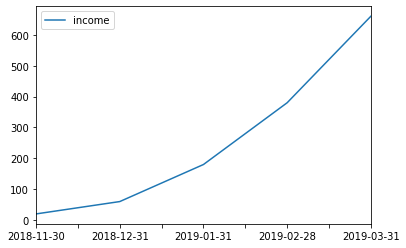

In [63]:
income.plot()

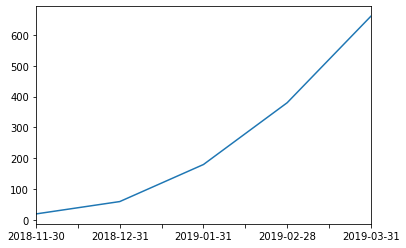

In [64]:
income['income'].plot()

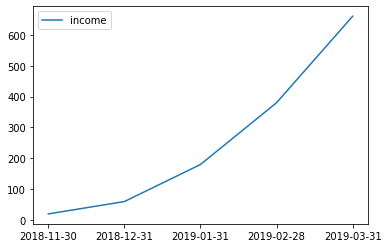

In [65]:
sns.lineplot(data=income)

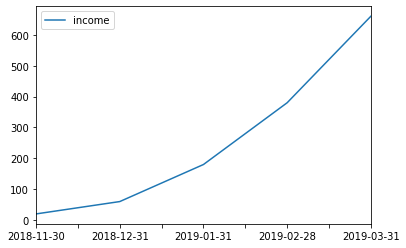

In [66]:
income.plot(kind='line')

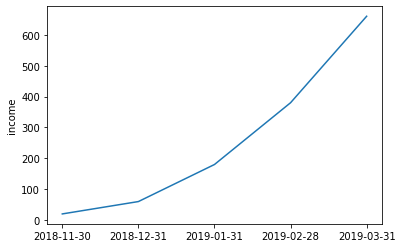

In [67]:
sns.lineplot(x=income.index, y=income.income)

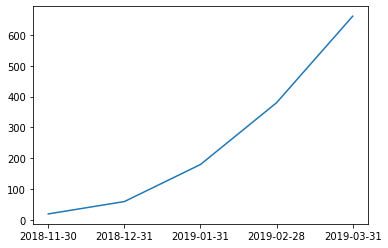

In [68]:
plt.plot(income.index, income.income)

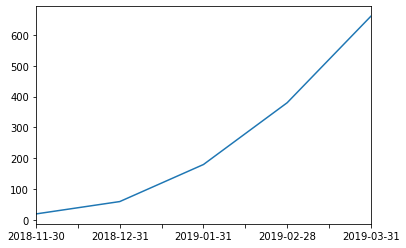

In [69]:
income.income.plot()

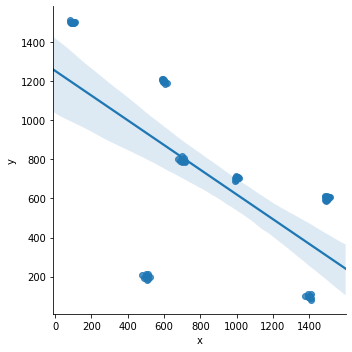

In [70]:
data = pd.read_csv("C:/Users/MSI/Downloads/dataset_209770_6.txt", sep =" ")
data.head()
sns.lmplot(x='x',y='y',data=data)

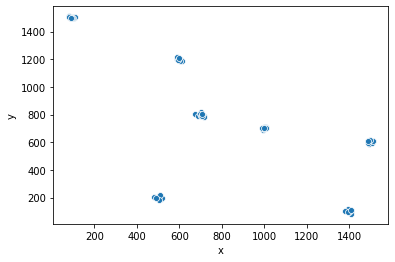

In [71]:
sns.scatterplot(data.iloc[:, 0], data.iloc[:, 1])

In [72]:
genome = pd.read_csv("https://stepik.org/media/attachments/course/4852/genome_matrix.csv", index_col=0)
genome.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


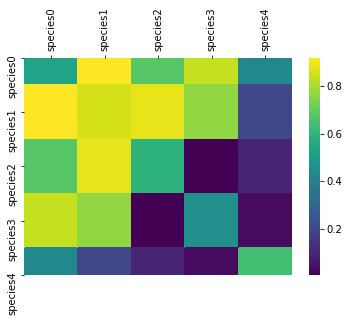

In [73]:
g = sns.heatmap(genome, cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

In [74]:
dota = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
dota.head()
#dota.roles_number = dota.apply(lambda row: str(row.roles).count(',') + 1)

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


Cделаем, выполнив небольшой feature engineering. Вначале создадим новую колонку 'roles_number':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028B440FB588>]],
      dtype=object)

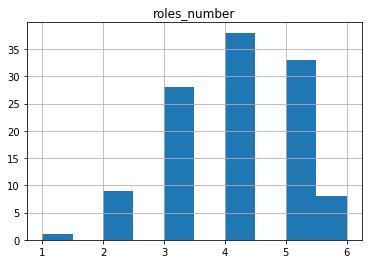

In [75]:
dota['roles_number'] = dota['roles'].apply(lambda s: s.count(',') + 1)

dota.hist(column='roles_number')

Число признаков, встречающееся у наибольшего числа героев = 4


#### Строим распределение для столбцов DataFrame-а
Новый датасет, построить распределение для некоторых признаков из датасета

Справка: унимодальное распределение = один горб на графике окна Парзена

In [76]:
import pandas as pd
import seaborn as sns

In [77]:
flowers = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv')
flowers.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


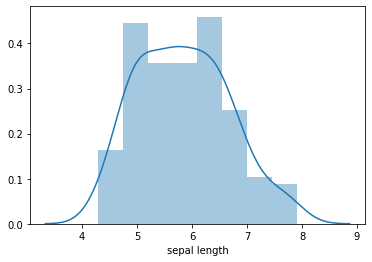

In [78]:
sns.distplot(flowers['sepal length'])

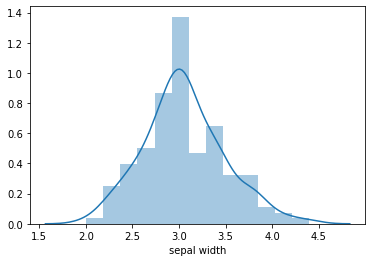

In [79]:
sns.distplot(flowers['sepal width'])

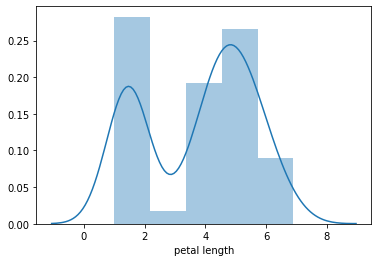

In [80]:
sns.distplot(flowers['petal length'])

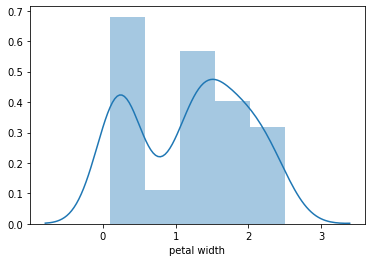

In [81]:
sns.distplot(flowers['petal width'])

График-виолончель (violin plot) - комбинация kde- и boxplot-графиков:

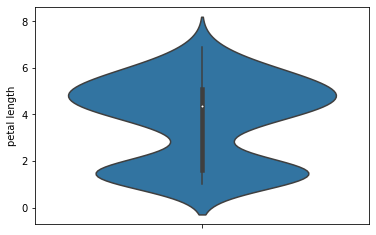

In [82]:
sns.violinplot(flowers['petal length'], orient = 'v')

Он удобен, когда нужно построить график для двух распределений (по одному с каждой из сторон)

Следующий - pairplot-график, строит попарные scatterplot-графики для каждого из признаков в таблице:

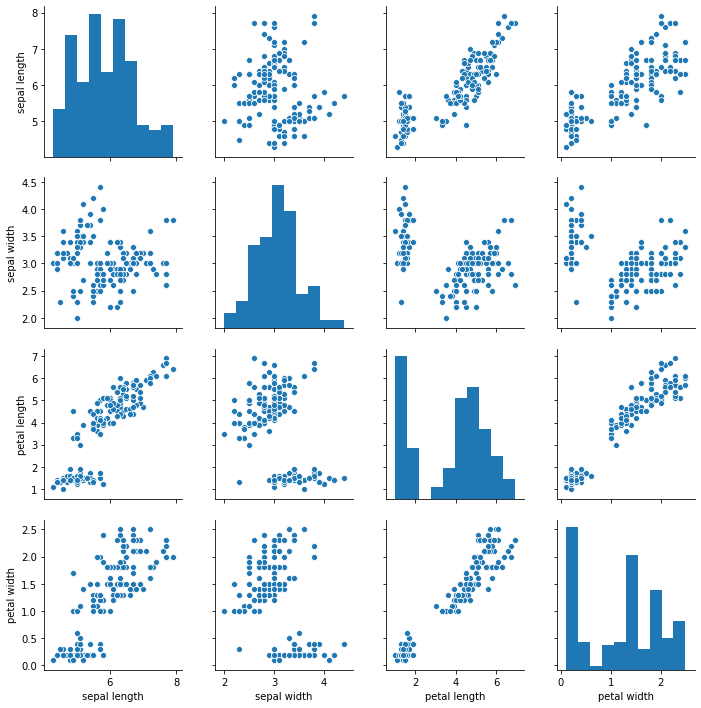

In [83]:
sns.pairplot(flowers, vars = ['sepal length', 'sepal width', 'petal length', 'petal width'])

#### Возвращаемся к pandas:


В dataframe с именем my_stat сохранены данные с 4 колонками: session_value, group, time, n_users.  

В переменной session_value замените все пропущенные значения на нули.

В переменной n_users замените все отрицательные значения на медианное значение переменной n_users (без учета отрицательных значений, разумеется). 


In [131]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
df['session_value'].fillna(0, inplace=True)
df.head(100)

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


Тут достаём медиану:

In [126]:
m = df[df['n_users'] >= 0].median()
m = m['n_users']

Вот так применяется apply к одной колонке:

In [130]:
df['n_users']=df['n_users'].apply(lambda x: m if x < 0 else x)
df

,session_value,time,group,n_users
0,0.0,12,B,9.0
1,0.0,11,A,5.0
2,1.0,8,A,1.0
3,2.0,9,B,3.0
4,2.0,10,B,9.0
5,3.0,8,A,8.0
6,0.0,11,B,5.0
7,0.0,9,A,4.0
8,0.0,8,B,5.0
9,0.0,9,A,5.0


#### Важно:
apply uses an internal loop over rows that is far slower than vectorized functions, like e.g. df.a = df.a / 2 

Подробнее про это: https://stackoverflow.com/questions/34962104/pandas-how-can-i-use-the-apply-function-for-a-single-column

Там же для одной колонки советуют использовать map, так как apply ходит по всем строкам всего датафрейма

#### Вариант в пару строк:

In [137]:
import pandas as pd    
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
my_stat = my_stat.fillna(0)
my_stat.n_users = my_stat.n_users.where(my_stat.n_users >= 0, my_stat.n_users[my_stat.n_users >= 0].median())